In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
import openai

from IPython.core.display import display, HTML
from pyvis import network as net
import networkx as nx

In [3]:
df = pd.read_csv("/Users/gabrielcunhaps/Desktop/Others/chatgpt/connections-gabriel.csv")
column_names = ['first_name', 'last_name', 'url', 'email_address', 'company', 'position', 'connected_on']
if list(df.columns) != column_names:
        df = pd.read_csv('connections-gabriel.csv', skiprows=3, header=None, names=column_names)
df

,first_name,last_name,url,email_address,company,position,connected_on
0,Ethan,Katz,https://www.linkedin.com/in/ethankatz03,NaN,AlphaSights,"Manager, Private Equity",17-Sep-23
1,Giulio,Batterman,https://www.linkedin.com/in/giulio-batterman-1...,NaN,Boston Consulting Group (BCG),Principal,17-Sep-23
2,AJ,"Redmond, CFA",https://www.linkedin.com/in/aj-redmond-cfa-019...,NaN,Bloomberg,Sell-Side Risk Product Sales,17-Sep-23
3,Andrew,Westrich,https://www.linkedin.com/in/andrew-westrich-61...,NaN,JPMorgan Chase & Co.,Asset/Wealth Management Associate,16-Sep-23
4,Max,Schmulewitz,https://www.linkedin.com/in/max-schmulewitz-09...,NaN,EY-Parthenon,Director,16-Sep-23
...,...,...,...,...,...,...,...
1025,Davi Alexandre,Schoenardie,https://www.linkedin.com/in/davihschoenar,NaN,Hospital Universitário Santa Terezinha (HUST),Produtor Gráfico I,26-Jul-18
1026,Jasper,Feinberg,https://www.linkedin.com/in/jasper-f-70476997,NaN,Blackstone,Associate,23-Jul-18
1027,Stefano,Malfitano,https://www.linkedin.com/in/stefanomalfitano,NaN,Cyrus Capital Partners,Principal,23-Jul-18
1028,Nina,Cubero,https://www.linkedin.com/in/nina-cubero-b85034152,NaN,Harvard Law School,Law Student,22-Jul-18


In [4]:
## Total number of connections
num_connections = df.shape[0]
print(num_connections)

1030


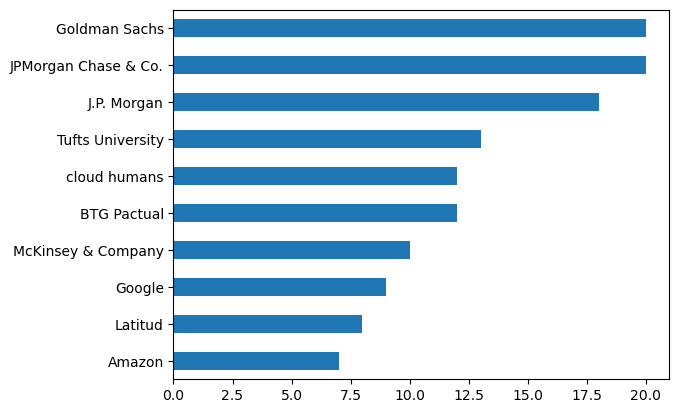

In [5]:
## TOP 10 COMPANIES
df['company'].value_counts().head(10).plot(kind="barh").invert_yaxis();

In [24]:
## TOP 10 COMPANIES
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)

# Add percentage column
df_company['percentage %'] = (df_company['count'] / df_company['count'].sum()) * 100

# Display top 10 companies with counts and percentages
df_company.head(10)

,company,count,percentage %
0,Goldman Sachs,20,1.986097
1,JPMorgan Chase & Co.,20,1.986097
2,J.P. Morgan,18,1.787488
3,Tufts University,13,1.290963
4,cloud humans,12,1.191658
5,BTG Pactual,12,1.191658
6,McKinsey & Company,10,0.993049
7,Google,9,0.893744
8,Latitud,8,0.794439
9,Amazon,7,0.695134


In [6]:
## TOP 10 COMPANIES
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)

# Add percentage column
df_position['percentage %'] = (df_position['count'] / df_position['count'].sum()) * 100

# Display top 10 companies with counts and percentages
df_position.head(10)

,position,count,percentage %
0,CEO,22,2.182540
1,Founder,20,1.984127
2,Associate,14,1.388889
3,Partner,10,0.992063
4,Co-Founder,10,0.992063
5,Software Engineer,9,0.892857
6,Founder & CEO,9,0.892857
7,Chief Executive Officer,7,0.694444
8,Founder and CEO,6,0.595238
9,Product Manager,6,0.595238


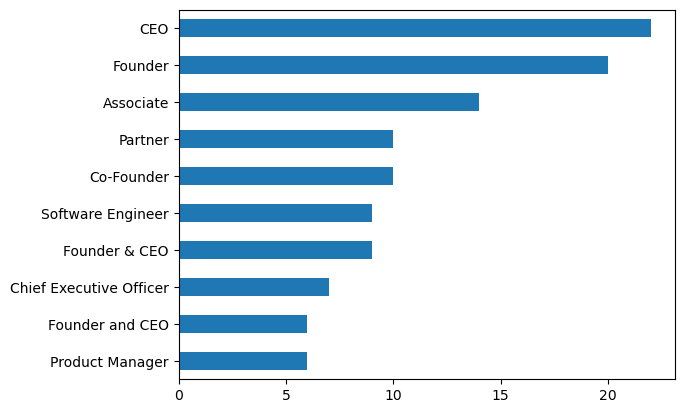

In [26]:
## TOP 10 POSITIONS
df['position'].value_counts().head(10).plot(kind="barh").invert_yaxis();

In [7]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming you have already read your CSV file and processed it as you described
# df = pd.read_csv("/Users/gabrielcunhaps/Desktop/Others/chatgpt/connections-gabriel.csv")
# column_names = ['first_name', 'last_name', 'email_address', 'company', 'position', 'connected_on']
# if list(df.columns) != column_names:
#     df = pd.read_csv('connections-gabriel.csv', skiprows=3, header=None, names=column_names)

# Function to get all contacts for a selected company
def get_contacts_by_company(selected_company):
    company_contacts = df[df['company'] == selected_company]
    return company_contacts

# Get the unique company names
companies = df['company'].unique()

# Create a dropdown widget
company_dropdown = widgets.Dropdown(
    options=companies,
    description='Select a company:'
)

# Output area to display contacts
output = widgets.Output()

# Function to update the displayed contacts when a company is selected
def on_company_change(change):
    selected_company = change.new
    company_contacts = get_contacts_by_company(selected_company)
    
    # Clear the previous output before displaying new results
    with output:
        clear_output(wait=True)
        display(company_contacts)

# Attach the change event handler to the dropdown
company_dropdown.observe(on_company_change, names='value')

# Display the widgets
display(company_dropdown)
display(output)

Dropdown(description='Select a company:', options=('AlphaSights', 'Boston Consulting Group (BCG)', 'Bloomberg'…

Output()

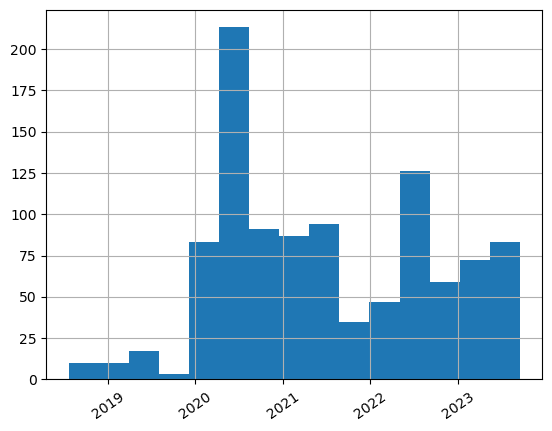

In [17]:
## DATE OF CONNECTED ON
df['connected_on'] = pd.to_datetime(df['connected_on'])
df['connected_on'].hist(xrot=35, bins=15);

In [18]:
## EMAILS
df = df.drop(columns="connected_on")
df[df["email_address"].notnull()]

,first_name,last_name,email_address,company,position
Octavio,Deliberato Neto,https://www.linkedin.com/in/odneto,octavio.deliberato@aggxtream.com,AGX Soluções em Otimização de Processos,Director of Technical Services
João Pedro,Rocha Cunha,https://www.linkedin.com/in/jo%C3%A3o-pedro-ro...,joaopedro_rcunha@icloud.com,Beyond Films,Talent Producer
Belen,Gallego,https://www.linkedin.com/in/belen-gallego-b075...,bgv1995@gmail.com,Boston Consulting Group (BCG),Consultant
Andre,Ferraz,https://www.linkedin.com/in/andreferraz,andre@incognia.com,Incognia,Founder and CEO
David,Paffenholz,https://www.linkedin.com/in/david-paffenholz,david.paffenholz@gmail.com,Juicebox (YC S22),CEO & Co-Founder
Lucia,Deschamps,https://www.linkedin.com/in/luciadeschamps,lucia.des@hotmail.com,Latitud,Growth Specialist
Evelyn,Azevedo,https://www.linkedin.com/in/evelyn-azevedo,evelyn.azevedo1515@gmail.com,T´ Ouço,Proprietário da empresa
Rogério,Kivel,https://www.linkedin.com/in/rogeriokivel,rogeriokivel.adv@gmail.com,Drip (YC S22),"Analista de Operações Sr. (Cobrança, Recuperaç..."
Marcos,Simeão,https://www.linkedin.com/in/marcos-simeao,simeao.marcos89@gmail.com,QuintoAndar,Product Leader | Nok Nox
Diego,Amaral,https://www.linkedin.com/in/diego-amaral-melo,diegoamaralcamp@gmail.com,cloud humans,Product Manager


In [ ]:
#I type a project I'm working on and it gives me people I can contact from my connection

In [ ]:
#divide by industry (with GPT)
#merge positions (with GPT)
#create network map for industry per company per person

In [ ]:
# date connected, positions, company, email available 

In [ ]:
# ações do que fazer com os contatos

In [ ]:
# para as 10 maiores empresas & positions - 10 contatos
# escolher a empresa e ver as pessoas delas 